In [12]:
import numpy as np
from sklearn import datasets
from sklearn.metrics import pairwise_distances
import random
import matplotlib.pyplot as plt

In [13]:
iris = datasets.load_iris()
X = iris.data

In [14]:
num_chromosomes = 100 
max_generations = 50   
num_clusters = 3     

In [15]:
def initialize_population(num_individuals, num_data_points, num_clusters):
    return [np.random.randint(1, num_clusters+1, size=num_data_points) for _ in range(num_individuals)]

In [16]:
def calculate_fitness(chromosome, data):
    centroids = np.array([np.mean(data[chromosome == i], axis=0) for i in range(1, num_clusters+1)])
    intra_distance_sum = sum(np.linalg.norm(data[chromosome == i] - centroids[i-1]) for i in range(1, num_clusters+1))
    return intra_distance_sum


In [17]:
def crossover(parent1, parent2):
    point = random.randint(1, len(parent1) - 1)
    child1 = np.concatenate([parent1[:point], parent2[point:]])
    child2 = np.concatenate([parent2[:point], parent1[point:]])
    return child1, child2

In [18]:
def mutate(chromosome, num_clusters):
    mutation_idx = random.randint(0, len(chromosome) - 1)
    chromosome[mutation_idx] = random.randint(1, num_clusters)
    return chromosome

In [21]:
def plot_clusters(data, chromosome, centroids, generation):
    colors = ['yellow', 'red', 'green', 'purple', 'blue']
    plt.figure(figsize=(8, 6))
    for i in range(1, num_clusters+1):
        points = data[chromosome == i]
        if len(points) > 0:
            plt.scatter(points[:, 0], points[:, 1], s=30, c=colors[i % len(colors)], label=f'Cluster {i}')
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, c='black', label='Centroids')
    plt.title(f'Cluster visualization at Generation {generation}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()
def plot_fitness_history(fitness_history):
    plt.figure(figsize=(8, 6))
    plt.plot(fitness_history, marker='o', linestyle='-')
    plt.title('Fitness Evolution Over Generations')
    plt.xlabel('Generation')
    plt.ylabel('Fitness')
    plt.show()

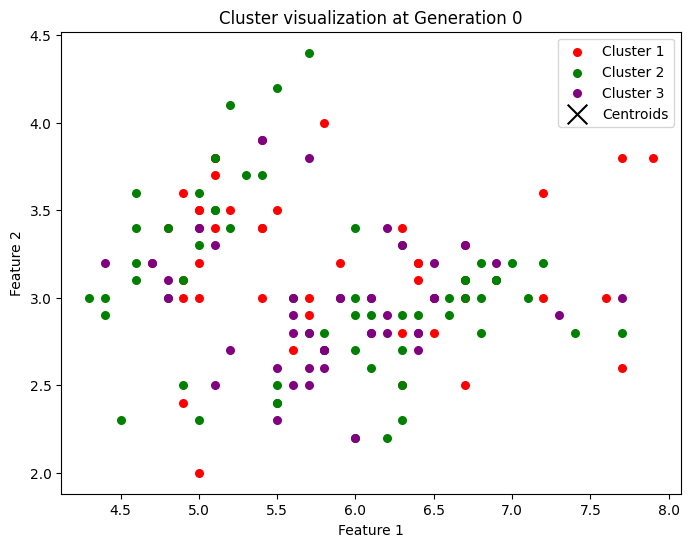

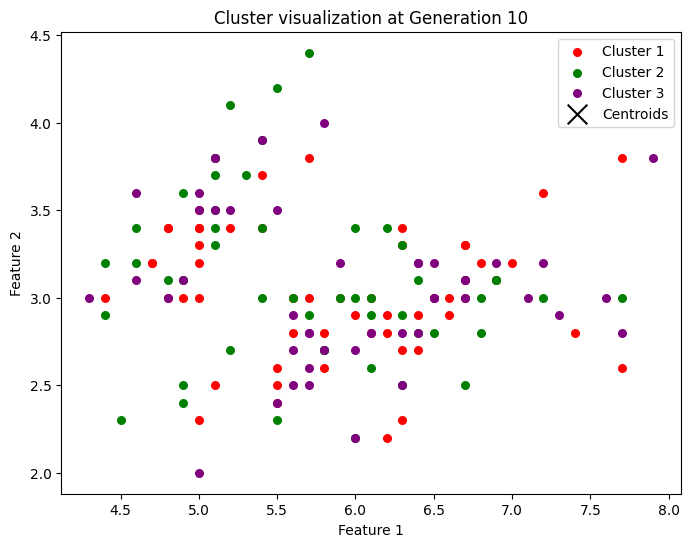

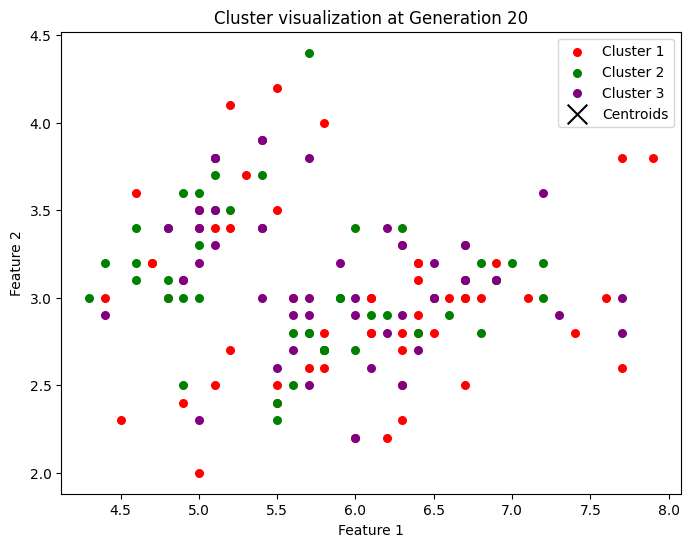

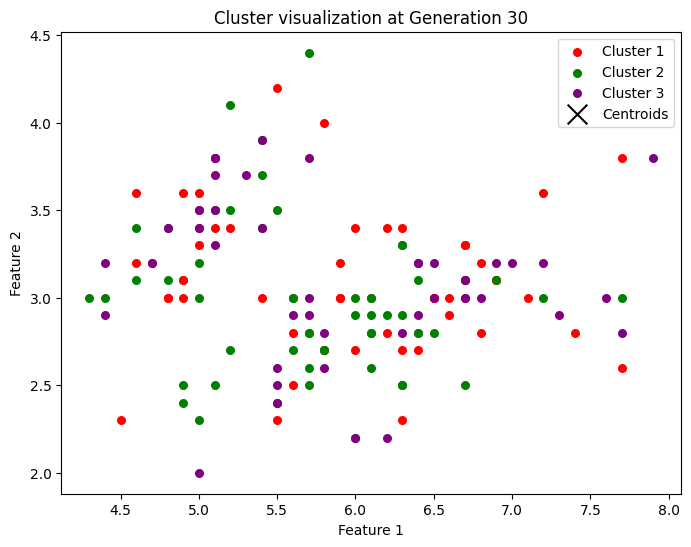

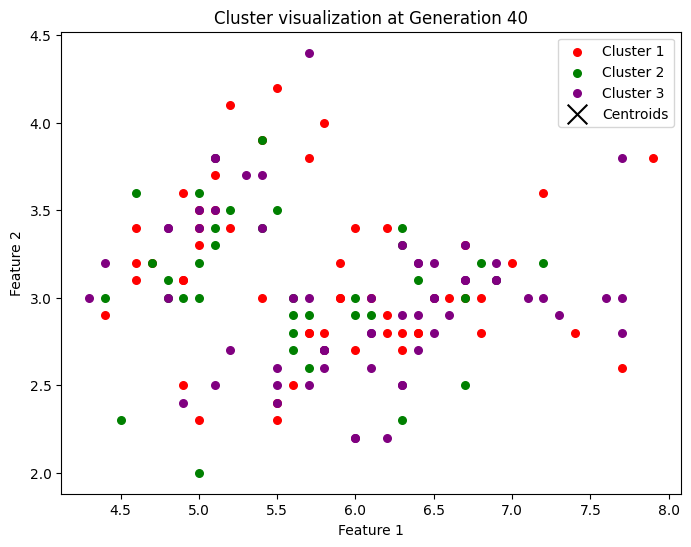

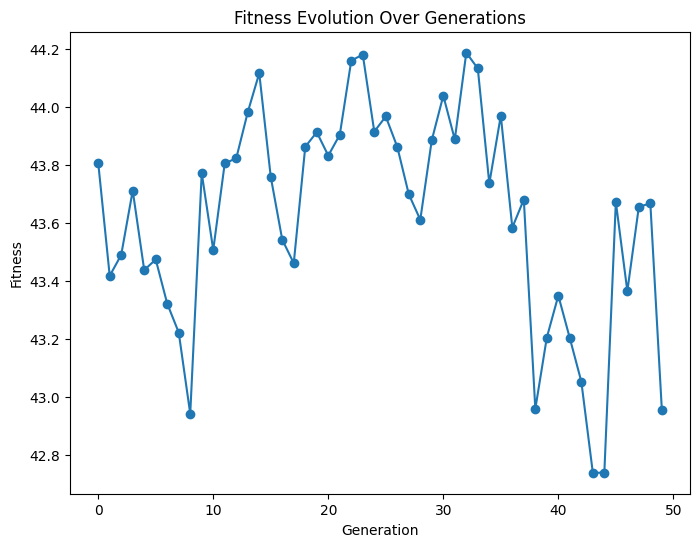

Best chromosome: [3 1 3 2 2 3 2 1 3 1 2 2 1 2 1 2 3 2 1 3 1 1 2 2 3 2 2 3 2 3 2 1 1 2 1 2 2
 1 2 2 2 1 2 2 3 2 2 2 1 2 2 1 1 3 1 1 2 3 3 2 1 1 3 2 2 1 1 3 2 1 3 2 3 3
 3 1 1 1 2 2 2 1 3 1 1 1 3 2 2 1 1 1 1 1 1 1 2 2 3 3 3 2 1 3 2 1 1 3 1 3 3
 1 3 3 1 1 3 1 3 1 2 3 3 2 1 1 3 3 1 2 1 1 1 1 3 3 3 2 2 3 3 3 3 2 2 1 3 3
 1 2]
Best fitness: 42.737918731036835


In [22]:
def genetic_algorithm(X, num_clusters):
    population = initialize_population(num_chromosomes, X.shape[0], num_clusters)
    best_fitness_history = []

    for generation in range(max_generations):
        fitness_scores = [calculate_fitness(ind, X) for ind in population]
        best_fitness_history.append(min(fitness_scores))

 
        total_fitness = sum(fitness_scores)
        probabilities = [f / total_fitness for f in fitness_scores]
        selected_indices = np.random.choice(range(num_chromosomes), size=num_chromosomes, replace=True, p=probabilities)
        selected_population = [population[idx] for idx in selected_indices]

      
        next_population = []
        for i in range(0, num_chromosomes, 2):
            p1, p2 = selected_population[i], selected_population[i+1]
            c1, c2 = crossover(p1, p2)
            c1 = mutate(c1, num_clusters)
            c2 = mutate(c2, num_clusters)
            next_population.extend([c1, c2])

        population = next_population

        if generation % 10 == 0:
            centroids = np.array([np.mean(X[population == i], axis=0) for i in range(1, num_clusters+1)])
            plot_clusters(X, population[0], centroids, generation)
        best_fitness = min(best_fitness_history)
        best_chromosome = population[np.argmin([calculate_fitness(ind, X) for ind in population])]
    plot_fitness_history(best_fitness_history)

    return best_chromosome, best_fitness
best_chromosome, best_fitness = genetic_algorithm(X, num_clusters)
print("Best chromosome:", best_chromosome)
print("Best fitness:", best_fitness)